In [1]:
import tensorflow as tf
print(tf.__version__)

2025-08-21 16:19:16.808578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755793157.034613      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755793157.105617      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.18.0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import glob as gb
import cv2
from pathlib import Path


In [3]:

data_path = Path('/kaggle/input/face-mask-dataset/data')
image_path = data_path
data_dir = data_path


In [4]:
for folder in os.listdir(data_dir):
    print(folder)
    
    file=gb.glob(pathname=str(data_dir/folder/'*'))
    print(len(file))

without_mask
3828
with_mask
3725


In [5]:
size=[]
for folder in os.listdir(data_dir):
    #print(folder)
    
    file=gb.glob(pathname=str(data_dir/folder/'*'))
    #print(len(file))
    for image in file:
        img=plt.imread(image)
        size.append(img.shape)
     

In [6]:
pd.Series(size).value_counts()


(225, 225, 3)    663
(428, 320, 3)    381
(275, 183, 3)    255
(100, 100, 3)    207
(183, 275, 3)    181
                ... 
(69, 52, 3)        1
(110, 69, 3)       1
(98, 67, 3)        1
(219, 134, 3)      1
(292, 173, 3)      1
Name: count, Length: 2696, dtype: int64

In [7]:
code = {
    'without_mask': 0,
    'with_mask': 1
}
print(code)


{'without_mask': 0, 'with_mask': 1}


In [8]:
def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

In [9]:
getcode(1)


'with_mask'

In [10]:
x=[]
y=[]
for folder in os.listdir(data_dir):
    #print(folder)
    
    file=gb.glob(pathname=str(data_dir/folder/'*'))
    #print(len(file))
    for image in file:
        img=cv2.imread(image)
        resized_img=cv2.resize(img,(160,160))
        x.append(resized_img)
        y.append(code[folder])

In [11]:
set(y)


{0, 1}

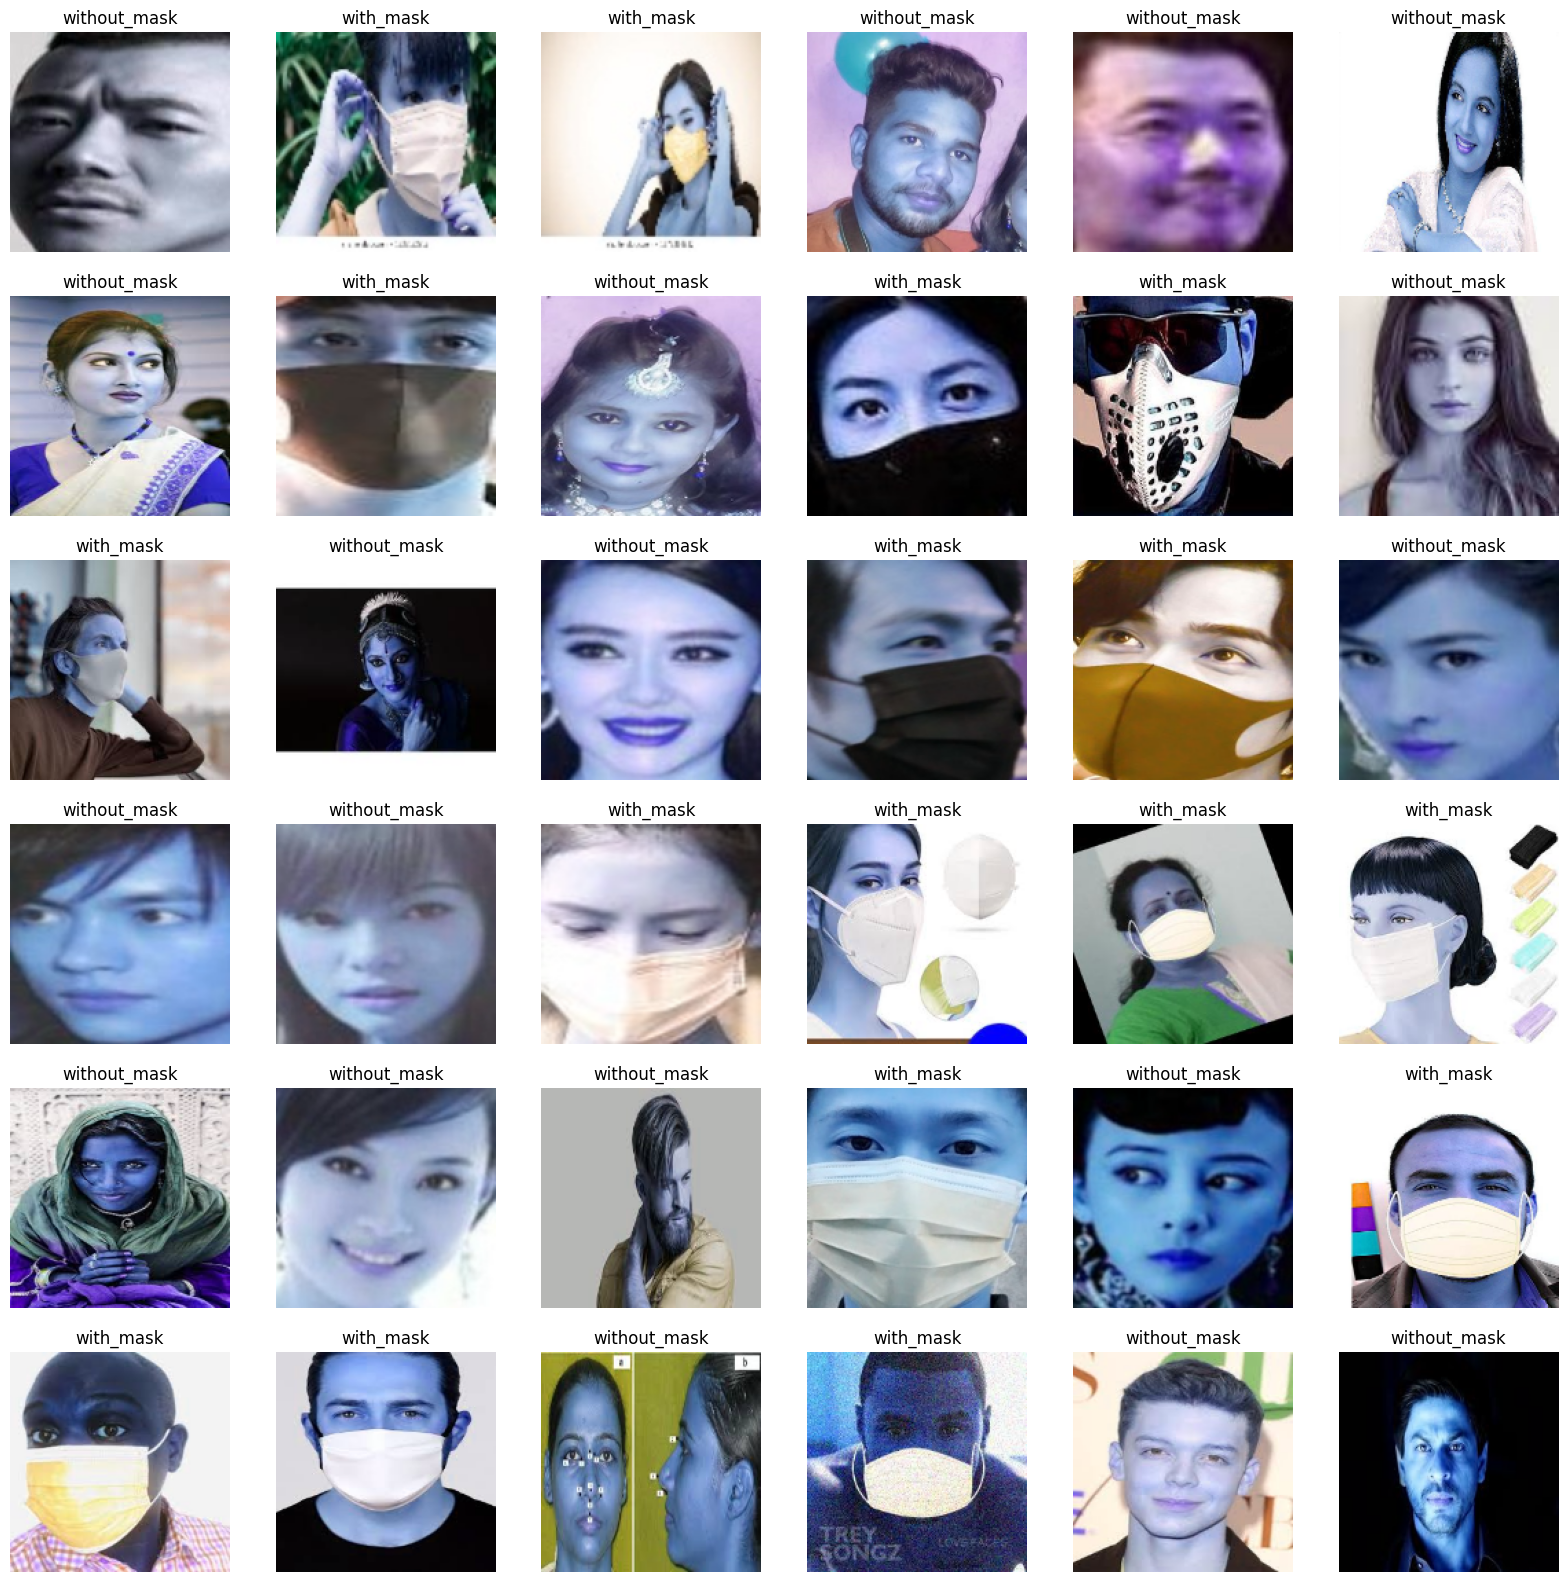

In [12]:
plt.figure(figsize=(20,20))

for n,i in enumerate(list(np.random.randint(0,len(x),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(x[i])
    plt.axis("off")
    plt.title(getcode(y[i]))
   


In [13]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,       
    random_state=42,     
    stratify=y           # balance classes
)


In [14]:
x_train=np.array(x_train)
x_test=np.array(x_test)


y_train=np.array(y_train)
y_test=np.array(y_test)


In [15]:
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_test: (1511, 160, 160, 3)
y_test: (1511,)


In [16]:
model = keras.models.Sequential([

    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Conv2D(512, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(2, 2),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),              
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),             


    keras.layers.Dense(38, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755793250.994654      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [17]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 158, 158, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 156, 156, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 156, 156, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 78, 78, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 76, 76, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 76, 76, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 74, 74, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 74, 74, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 35, 35, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 35, 35, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 33, 33, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 33, 33, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │             

 Total params: 15,249,894 (58.17 MB)

 Trainable params: 15,245,798 (58.16 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], jit_compile=False)

In [19]:
final=model.fit(x_train,y_train,epochs=17)


Epoch 1/17


I0000 00:00:1755793262.624975      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 156ms/step - accuracy: 0.8176 - loss: 1.0272
Epoch 2/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9015 - loss: 0.3736
Epoch 3/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9357 - loss: 0.2164
Epoch 4/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9385 - loss: 0.1735
Epoch 5/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9532 - loss: 0.1314
Epoch 6/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9651 - loss: 0.0948
Epoch 7/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9650 - loss: 0.0908
Epoch 8/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9746 - loss: 0.0735
Epoch 9/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9766 - loss: 0.0662
Epoch 10/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9838 - loss: 0.0474
Epoch 11/17
189/189 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.9890 - loss: 0.0382
Epoch 12/17
189/189 ━━━━━━━━━━

In [20]:
loss, acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9417 - loss: 0.1793
Test Accuracy: 0.9477
Test Loss: 0.1595


In [21]:
train_loss, train_acc = model.evaluate(x_train, y_train)


print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9812 - loss: 0.0571
Training Accuracy: 0.9800
Training Loss: 0.0570


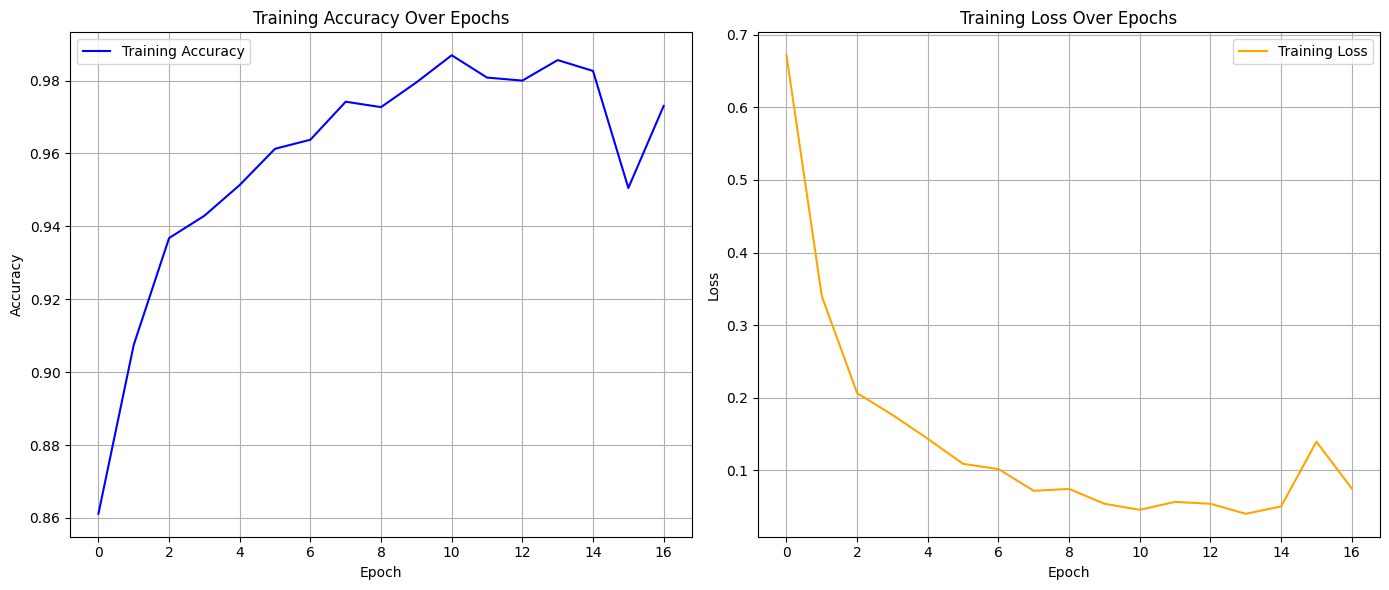

In [22]:
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(final.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(final.history['loss'], label='Training Loss', color='orange')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
import shutil
model.save("model.h5")
shutil.move('model.h5','/kaggle/working/model.h5')

'/kaggle/working/model.h5'